In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image
import time




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import copy
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import keras
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True
        


In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=10,            # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights to the best achieved during training
)



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile



# Define our example directories and files
IMAGE_SIZE = [150, 150]

train_datagen = ImageDataGenerator( rescale = 1./255.,
                                    rotation_range = 30,
                                    width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip=True, 
                                   fill_mode='nearest' 
                                   )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease/Train',
                                                    batch_size = 64,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( '/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease/Test',
                                                          batch_size  = 64,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150),
                                                          shuffle = False 
                                                    )



Found 4692 images belonging to 6 classes.
Found 1175 images belonging to 6 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))


model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))



model.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 2, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))



model.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = 2, activation = 'relu', name = 'last'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

model.add(tf.keras.layers.Dense(6, activation = 'softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 256)       131328    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [7]:
start = time.time()

# Compiling the CNN  # Set the training parameters
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
callbacks = myCallback()
history = model.fit_generator( train_generator, 
                  validation_data = validation_generator, 
                  epochs = 250,  
                  callbacks=[callbacks]
                 #steps_per_epoch=62,
                  #validation_steps=6
                 )

end = time.time()
elapsed = end - start
print("Total Time:", elapsed)

Epoch 1/250
74/74 [==============================] - 57s 701ms/step - loss: 1.4799 - accuracy: 0.3327 - val_loss: 1.0449 - val_accuracy: 0.5149
Epoch 2/250
74/74 [==============================] - 34s 459ms/step - loss: 1.1134 - accuracy: 0.5396 - val_loss: 0.9694 - val_accuracy: 0.5855
Epoch 3/250
74/74 [==============================] - 35s 468ms/step - loss: 0.9300 - accuracy: 0.6309 - val_loss: 0.6669 - val_accuracy: 0.7217
Epoch 4/250
74/74 [==============================] - 35s 466ms/step - loss: 0.7629 - accuracy: 0.7025 - val_loss: 1.0871 - val_accuracy: 0.6136
Epoch 5/250
74/74 [==============================] - 34s 465ms/step - loss: 0.7176 - accuracy: 0.7223 - val_loss: 0.6672 - val_accuracy: 0.7609
Epoch 6/250
74/74 [==============================] - 35s 470ms/step - loss: 0.5864 - accuracy: 0.7879 - val_loss: 0.5641 - val_accuracy: 0.7966
Epoch 7/250
74/74 [==============================] - 34s 463ms/step - loss: 0.5034 - accuracy: 0.8173 - val_loss: 0.4425 - val_accuracy:

In [8]:
model.save('saved_model/teaCnnv1.h5')

In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

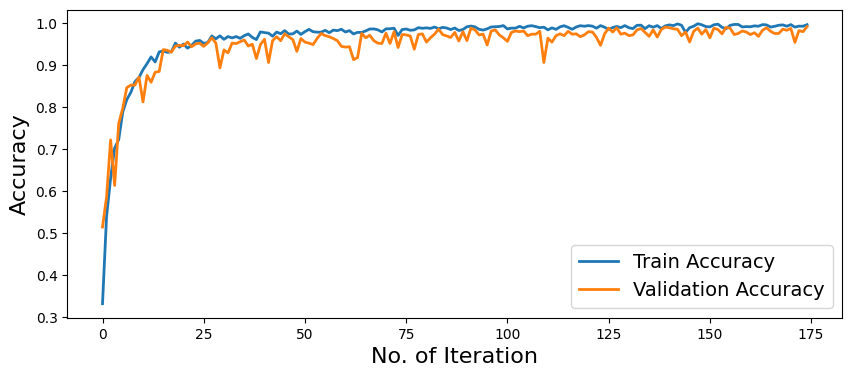

In [10]:
import matplotlib.pyplot as plt

# Your existing code for plotting
plt.figure(figsize=(10, 4))

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', lw=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', lw=2)

# Increase font size for axis labels
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('No. of Iteration', fontsize=16)

# Increase font size for legend
plt.legend(fontsize=14)

# Save the plot with high resolution
plt.savefig('accuracy_curve.png', dpi=300)

# Optionally, you can display the plot as well
plt.show()


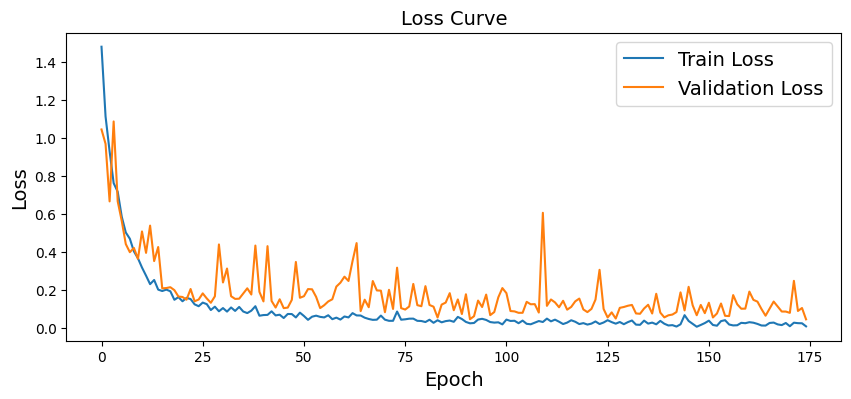

In [11]:
import matplotlib.pyplot as plt

# Plotting the loss curves
plt.figure(figsize=(10, 4))  # Optional: Adjust the size of the figure if needed

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set title and labels with specific font size
plt.title('Loss Curve', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Set legend with specific font size
plt.legend(fontsize=14)

# Save the plot with high resolution
plt.savefig('LossVal_loss_17.png', dpi=300)

# Show the plot
plt.show()


In [12]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns

In [13]:
# Load your saved model
loaded_model = tf.keras.models.load_model('saved_model/teaCnnv1.h5')


19/19 [==============================] - 2s 91ms/step


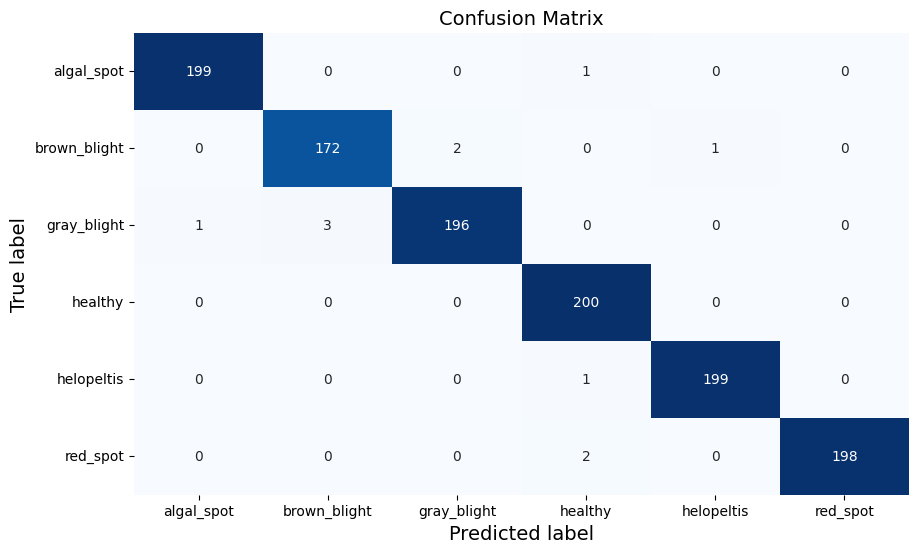

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

# Use the model to make predictions on the test data
y_pred = loaded_model.predict(validation_generator)

# Convert the predictions to class labels (0, 1, 2, ...)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true_classes = validation_generator.classes

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels (if you have them)
class_labels = [
    'algal_spot',
    'brown_blight',
    'gray_blight',
    'healthy',
    'helopeltis',
    'red_spot']  # Replace with your actual class labels

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
            xticklabels=class_labels, yticklabels=class_labels, ax=ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

# Save the plot with high resolution
plt.savefig('confusion_matrix2.png', dpi=300)

# Show the plot
plt.show()


In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already trained the model and saved it as 'deptwiseCnnv1.h5'
# Load the model
loaded_model = tf.keras.models.load_model('saved_model/teaCnnv1.h5')

# Generate predictions for the validation dataset
validation_generator.reset()  # Reset the generator to the beginning
predictions = loaded_model.predict(validation_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels for the validation dataset
true_labels = validation_generator.classes

# Get class labels (if needed)
class_labels = list(validation_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print the classification report
print(report)

19/19 [==============================] - 2s 89ms/step
              precision    recall  f1-score   support

  algal_spot       0.99      0.99      0.99       200
brown_blight       0.98      0.98      0.98       175
 gray_blight       0.99      0.98      0.98       200
     healthy       0.98      1.00      0.99       200
  helopeltis       0.99      0.99      0.99       200
    red_spot       1.00      0.99      0.99       200

    accuracy                           0.99      1175
   macro avg       0.99      0.99      0.99      1175
weighted avg       0.99      0.99      0.99      1175



37/37 [==============================] - 1s 9ms/step


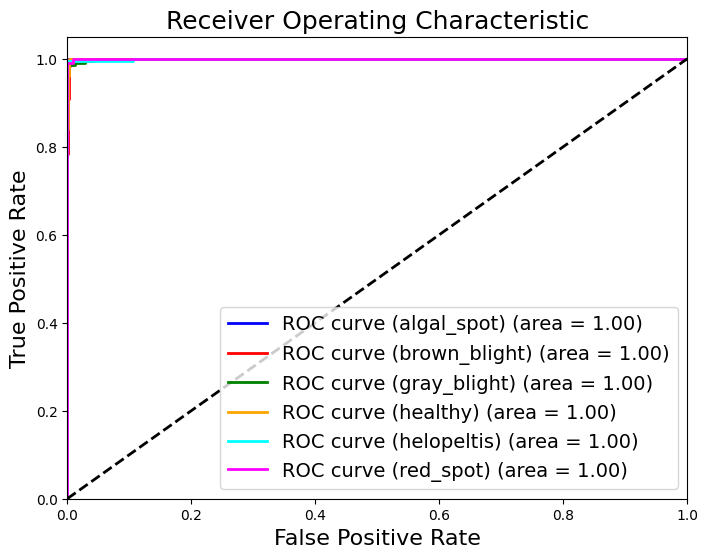

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Define class labels
class_labels = [
    'algal_spot',
    'brown_blight',
    'gray_blight',
    'healthy',
    'helopeltis',
    'red_spot']

# Define the number of batches for training and validation
num_train_batches = len(train_generator)
num_val_batches = len(validation_generator)

# Generate X_train and y_train from train_generator
X_train, y_train = [], []
for _ in range(num_train_batches):
    batch_x, batch_y = train_generator.next()
    X_train.extend(batch_x)
    y_train.extend(batch_y)     

# Generate X_test and y_test from validation_generator
X_test, y_test = [], []
for _ in range(num_val_batches):
    batch_x, batch_y = validation_generator.next()
    X_test.extend(batch_x)
    y_test.extend(batch_y)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):       
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define colors for each class
colors = ['blue', 'red', 'green', 'orange', 'cyan', 'magenta']

# Create a plot with larger text
plt.figure(figsize=(8, 6))

# Plot ROC curve for each class with labels
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve ({class_labels[i]}) (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Increase font size for axis labels and title
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=18)

# Increase font size for legend
plt.legend(loc="lower right", fontsize=14)

# Save the plot with high resolution
plt.savefig('roc_curve.png', dpi=300)

# Show the plot
plt.show()


37/37 [==============================] - 0s 9ms/step


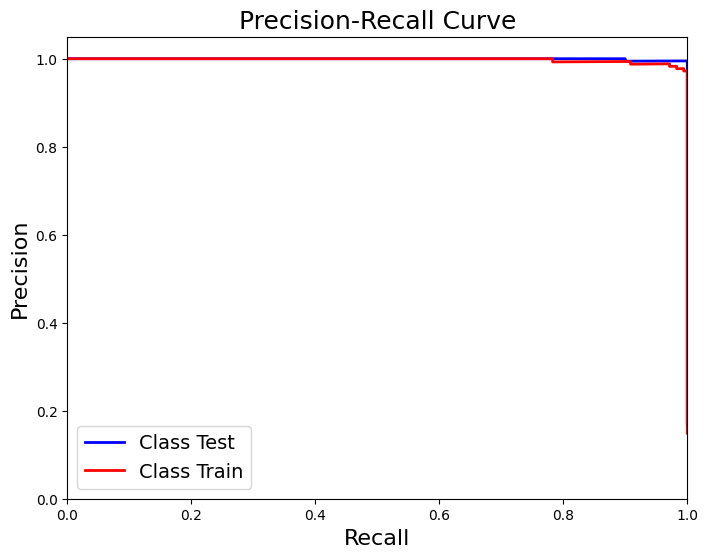

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np
import os

# Assuming X_test, y_test, and model are already defined

# Make predictions on the test set
y_pred = model.predict(X_test)

# Define class labels
room_types = os.listdir('/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease')

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(room_types)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])

# Create a plot with a larger font size
plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green', 'orange', 'cyan', 'magenta']  # Adjust the colors according to the number of classes

for i in range(len(room_types)):
    plt.plot(recall[i], precision[i], color=colors[i], lw=2, label='Class %s' % room_types[i])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Increase font size for axis labels and title
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=18)

# Increase font size for legend
plt.legend(loc="lower left", fontsize=14)

# Save the plot with high resolution
plt.savefig('precision_recall_curve.png', dpi=300)

# Show the plot
plt.show()


In [18]:
label_to_class = {
    'algal_spot': 0,
    'brown_blight': 1,
    'gray_blight':  2,
    'healthy':  3,
    'helopeltis': 4,
    'red_spot': 5
}

CLASS_TO_LABEL = {v: k for k, v in label_to_class.items()}

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, matthews_corrcoef

# Generate predictions on the test set
y_pred_proba = model.predict(validation_generator)  # Probability outputs
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute MCC
mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")


19/19 [==============================] - 2s 90ms/step
Confusion Matrix:
[[199   0   0   1   0   0]
 [  0 172   2   0   1   0]
 [  1   3 196   0   0   0]
 [  0   0   0 200   0   0]
 [  0   0   0   1 199   0]
 [  0   0   0   2   0 198]]
Matthews Correlation Coefficient: 0.9888


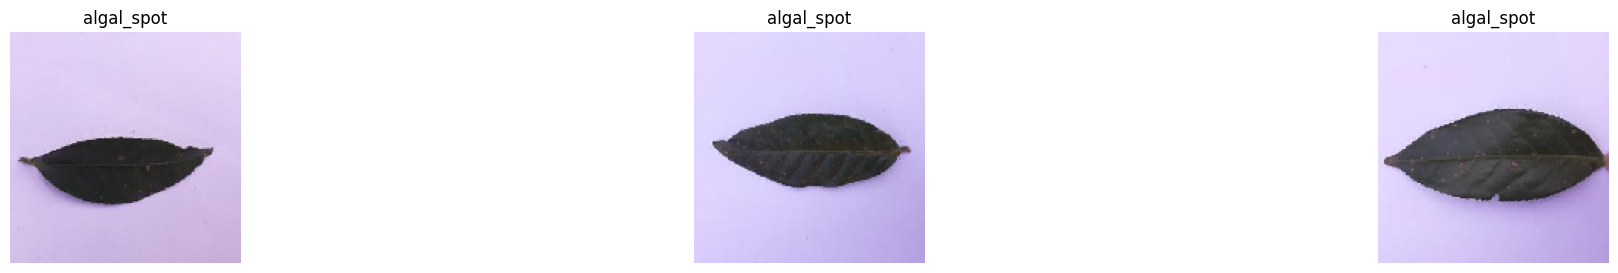

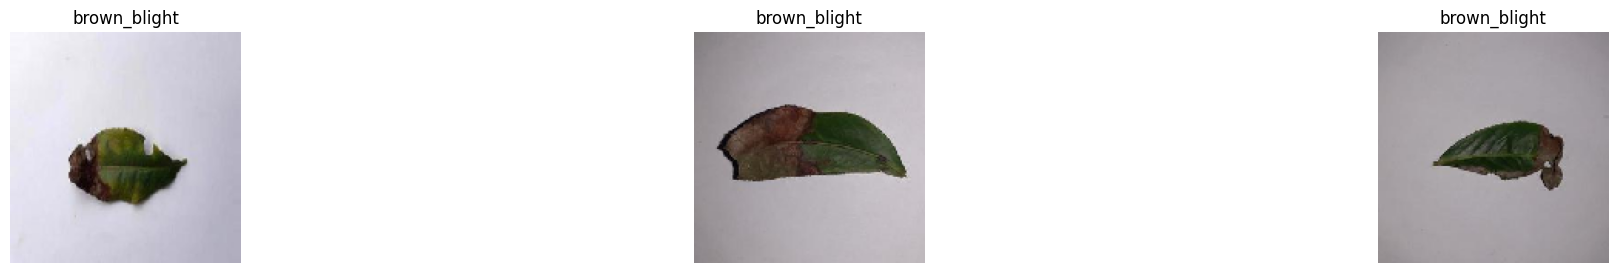

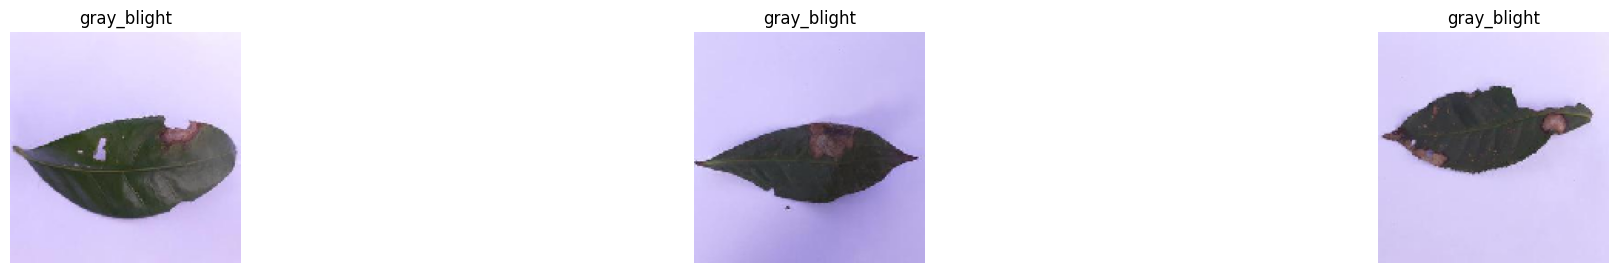

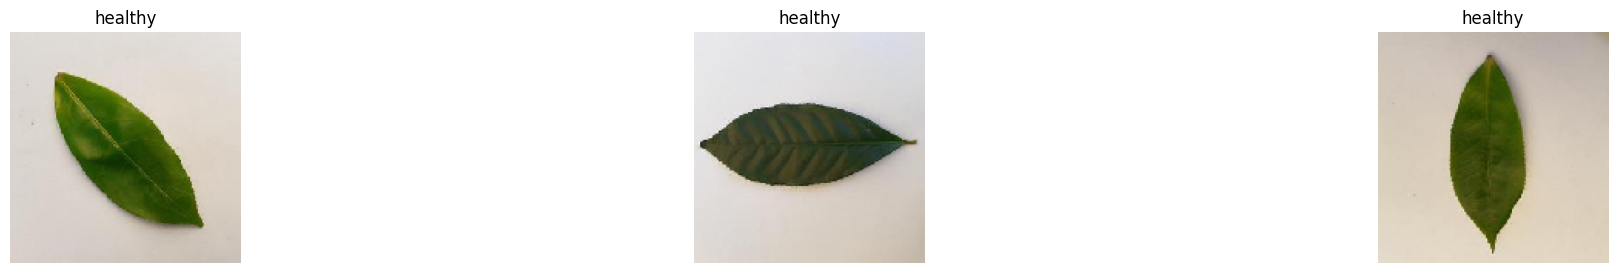

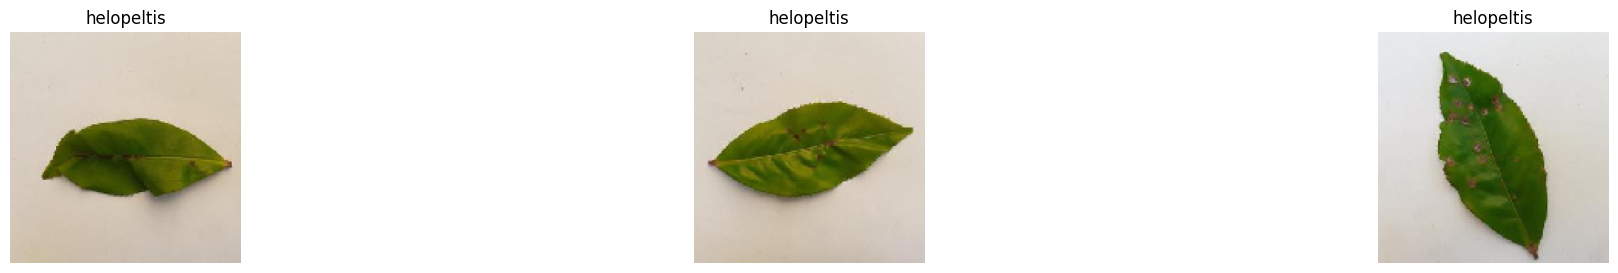

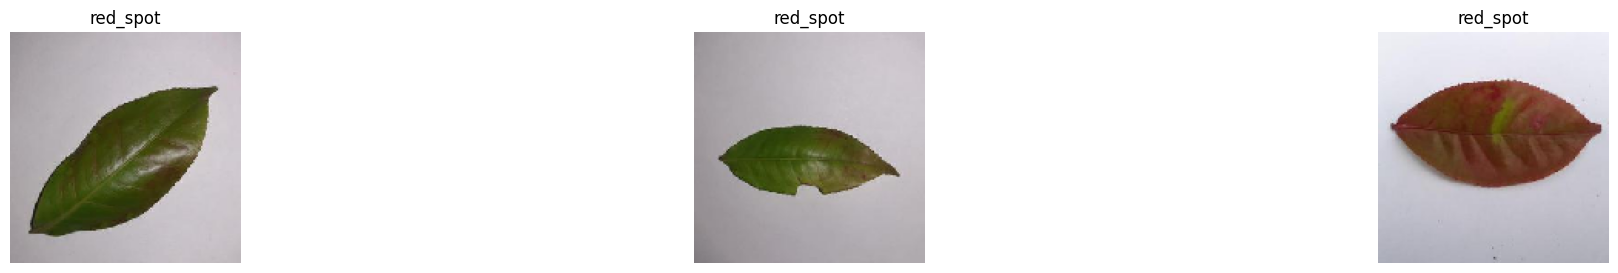

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle

def load_and_shuffle_images(dir_path, label_to_class):
    images = []
    classes = []

    for label_name in os.listdir(dir_path):
        cls = label_to_class[label_name]
        for img_name in os.listdir("/".join([dir_path, label_name])):
            img = load_img("/".join([dir_path, label_name, img_name]), target_size=(150, 150))
            img = img_to_array(img)
            images.append(img)
            classes.append(cls)

    images = np.array(images, dtype=np.float32)
    classes = np.array(classes, dtype=np.float32)
    images, classes = shuffle(images, classes, random_state=42)

    return images, classes

# Load and shuffle images and classes for the validation dataset
dir_path = "/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease/Test"
loaded_images, loaded_classes = load_and_shuffle_images(dir_path, label_to_class)

# Visualize some images / labels

for target_cls in list(CLASS_TO_LABEL.keys()):
    indices = np.where(loaded_classes == target_cls)[0]  # get target class indices on loaded data
    label = CLASS_TO_LABEL.get(target_cls, "Unknown")

    if len(indices) > 0:
        n_cols = min(3, len(indices))  # Limit the number of samples to the number available
        fig, axs = plt.subplots(ncols=n_cols, figsize=(25, 3))

        for i in range(n_cols):
            axs[i].imshow(np.uint8(loaded_images[indices[i]]))
            axs[i].axis('off')
            axs[i].set_title(label)

        plt.show()
    else:
        print(f"No images found for class: {label}")


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

last_conv_layer_name = "last"
img_path = "/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease/Test/algal_spot/20211227_132340.jpg"

img_size = (150, 150)



In [21]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 150 x 150
#     img = keras.preprocessing.image.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.preprocessing.image.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()


In [22]:
# Prepare image

In [23]:
# cam = plt.imread(img_path)
# def save_and_display_gradcam(img_path, heatmap, cam_path="campath.jpg", alpha=0.4):
#     # Load the original image
#     img = keras.preprocessing.image.load_img(img_path)
#     img = keras.preprocessing.image.img_to_array(img)

#     # Rescale heatmap to a range 0-255
#     heatmap = np.uint8(255 * heatmap)

#     # Use jet colormap to colorize heatmap
#     jet = cm.get_cmap("jet")

#     # Use RGB values of the colormap
#     jet_colors = jet(np.arange(256))[:, :3]
#     jet_heatmap = jet_colors[heatmap]

#     # Create an image with RGB colorized heatmap
#     jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
#     jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
#     jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

#     # Superimpose the heatmap on original image
#     superimposed_img = jet_heatmap * alpha + img
#     superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

#     # Save the superimposed image
#     superimposed_img.save(cam_path)

#     # Display Grad CAM
#     display(Image(cam_path))


# save_and_display_gradcam(img_path, heatmap)

In [24]:
# from PIL import Image
# from IPython.display import display

# # Specify the path to the image
# image_path = '/kaggle/working/campath.jpg'

# # Open the image using PIL
# image = Image.open(image_path)

# # Resize the image to your desired dimensions, e.g., 300x200 pixels
# new_size = (300, 200)
# resized_image = image.resize(new_size)

# # Display the resized image
# display(resized_image)


1/1 [==============================] - 0s 173ms/step


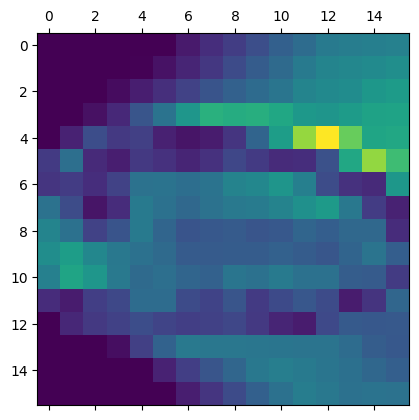

1/1 [==============================] - 0s 17ms/step


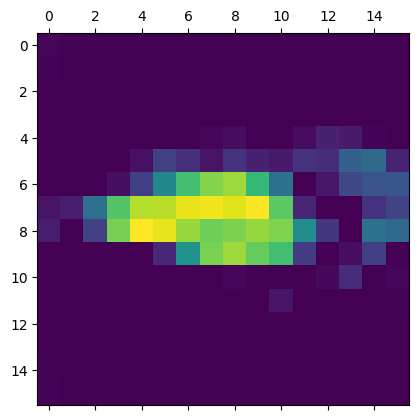

1/1 [==============================] - 0s 19ms/step


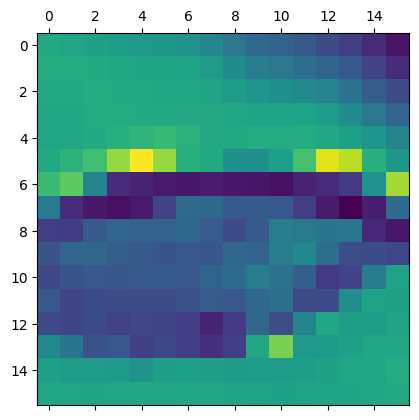

1/1 [==============================] - 0s 18ms/step


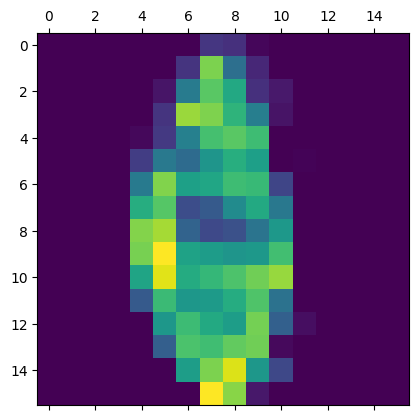

1/1 [==============================] - 0s 18ms/step


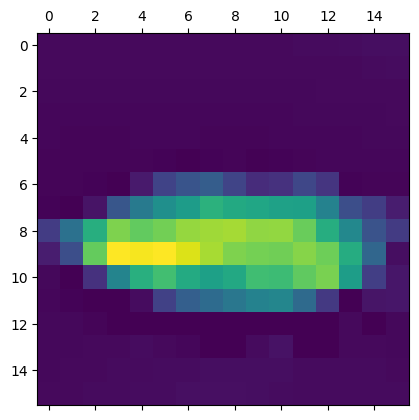

1/1 [==============================] - 0s 18ms/step


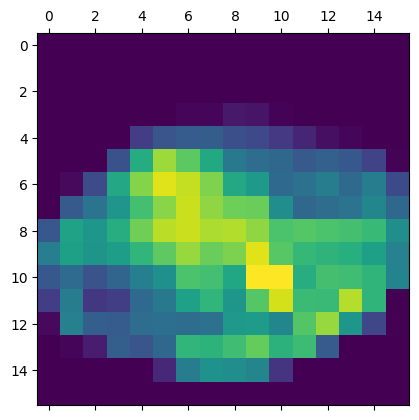

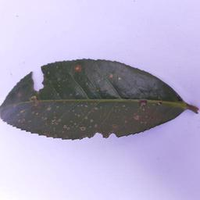

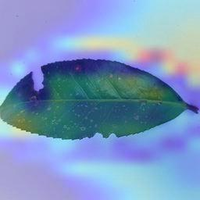

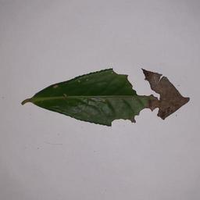

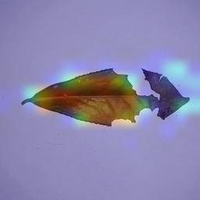

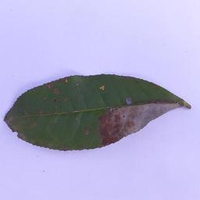

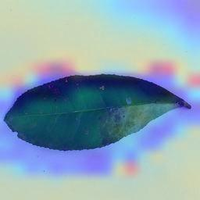

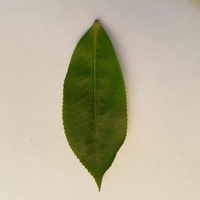

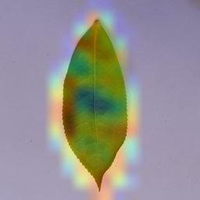

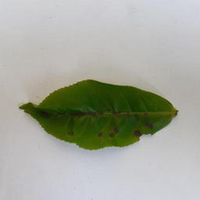

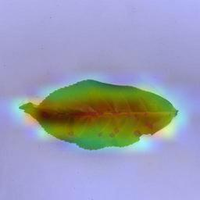

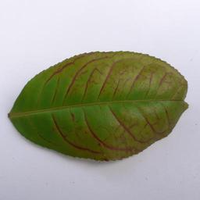

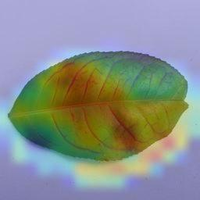

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
# Display the images horizontally (original image, heatmap image, superimposed image)
from PIL import Image as PILImage

# Define the directory containing the images for each class
base_dir = "/kaggle/input/tea-sickness-large-dataset/Tea_Leaf_Disease/Test"
class_names = ['algal_spot','brown_blight','gray_blight','healthy','helopeltis','red_spot']
last_conv_layer_name = "last"
img_size = (150, 150)

# Load the pre-trained model (replace with your model loading code)
model = tf.keras.models.load_model('saved_model/teaCnnv1.h5')

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    return cam_path

# Create a directory to save the heatmap images
os.makedirs("heatmap_images", exist_ok=True)

# Loop through each class and process an image from each class
for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    image_files = os.listdir(class_dir)
    
    if len(image_files) == 0:
        print(f"No images found for class: {class_name}")
        continue
    
    # Select the first image from the class
    img_path = os.path.join(class_dir, image_files[0])

    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    model.layers[-1].activation = None
    preds = model.predict(img_array)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display heatmap
    plt.matshow(heatmap)
    plt.show()
    
    # Save Grad-CAM for each image
    cam_path = f"heatmap_images/gradcam_{class_name}.jpg"
    cam_path = save_and_display_gradcam(img_path, heatmap, cam_path)
    


# Define the desired size for resized images
resized_img_size = (200, 200)

for class_name in class_names:
    img_path = os.path.join(base_dir, class_name, os.listdir(os.path.join(base_dir, class_name))[0])
    original_img = PILImage.open(img_path)
    cam_path = f"heatmap_images/gradcam_{class_name}.jpg"
    heatmap_img = PILImage.open(cam_path)
    
    # Resize the original_img
    original_img = original_img.resize(resized_img_size, PILImage.ANTIALIAS)

    # Resize the heatmap_img
    heatmap_img = heatmap_img.resize(resized_img_size, PILImage.ANTIALIAS)
    
    # Display horizontally
    display(HTML(f"<h3>{class_name}</h3>"))
    display(original_img)
    display(heatmap_img)

